Goh Jie Min Jamie, 202332158, jamiegoh@ajou.ac.kr

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

salaries_df = pd.read_csv("Salaries.csv")
salaries_df.head()


/Users/jamiegoh/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
# Generate texts with a couple of sentences describing the data set based on your empirical insight and statistical approach. 

salaries_df.describe()

#This dataset contains the salaries of the employees in San Francisco . The dataset contains 148654 entries. It covers the salaries from 2011 to 2014.
#Most importantly, the dataset contains columns such as the base pay, overtime pay, benefits, total pay, total pay and benefits, year, and the job title of the employees.
#The base pay in this data set ranges from -166.01 to 319275.01. 
#The overtime pay ranges from 0 to 245131.88. 
#The benefits range from -33.89 to 96570.66. 
#The total pay ranges from -618.13 to 567595.43. 
#The total pay and benefits range from -618.13 to 567595.43
#The data of the pays contain some NaN & Not Provided values. The data is thus incomplete.


,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [4]:
#What is the average of the variable “BasePay”? 
salaries_df.fillna(0, inplace = True)
salaries_df.replace('Not Provided', 0, inplace = True)
salaries_df["BasePay"] = salaries_df["BasePay"].astype(float)

In [5]:
salaries_df["BasePay"].mean()

66053.72928809702

In [6]:
# What is the highest value of the variable “OvertimePay”? 
salaries_df["OvertimePay"] = salaries_df["OvertimePay"].astype(float)
salaries_df["OvertimePay"].max()

245131.88

In [7]:
#What is the job title of the observation, “JOSEPH DRISCOLL”? 
salaries_df[salaries_df["EmployeeName"] == "JOSEPH DRISCOLL"]["JobTitle"]

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [8]:
#How much has “JOSEPH DRISCOLL” earned (including the variable “Benefits”)? 
salaries_df[salaries_df["EmployeeName"] == "JOSEPH DRISCOLL"]["TotalPayBenefits"]

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [9]:
#Who is the person paid the most (including benefits)?
salaries_df[salaries_df["TotalPayBenefits"] == salaries_df["TotalPayBenefits"].max()]["EmployeeName"]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [10]:
#Who is the person paid the least (including benefits)? Explain if you notice anything strange about the salaries paid to the person with the lowest earnings.
salaries_df[salaries_df["TotalPayBenefits"] == salaries_df["TotalPayBenefits"].min()]["EmployeeName"]
salaries_df[salaries_df["EmployeeName"] == "Joe Lopez"]

# The strange thing is that his pay is negative, which is not possible. 
# I think that the data is not correct.



,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014,0.0,San Francisco,PT


In [11]:
#How many unique job titles can we see in the data set?
salaries_df["JobTitle"].nunique()

2159

In [12]:
#What are the top 5 job titles we can most frequently see in the data set?
salaries_df["JobTitle"].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [13]:
#How many job titles were occupied by a single person only in 2013?
sum(salaries_df[salaries_df["Year"] == 2013]["JobTitle"].value_counts() == 1)

202

In [18]:
# How many people have the word “Chief” in their job titles?

#Assuming case sensitive,

sum(salaries_df["JobTitle"].str.contains("Chief"))

#Assuming case insensitive, 

sum(salaries_df["JobTitle"].str.contains("Chief", case = False))

627

Text(0, 0.5, 'Frequency')

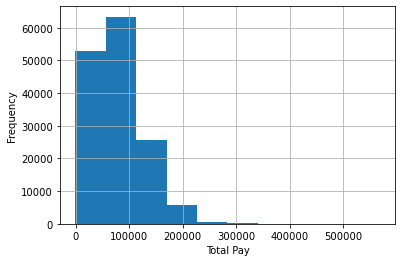

In [15]:
#Visualize a histogram to show the distribution of the variable “TotalPay” with all the observations in the data set.


salaries_df["TotalPay"].hist()
plt.xlabel("Total Pay")
plt.ylabel("Frequency")


Text(0, 0.5, 'Average Total Pay')

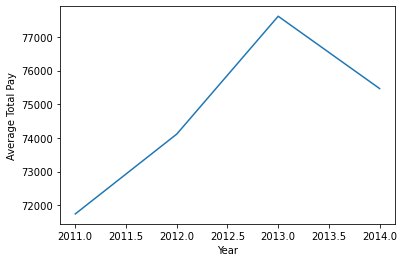

In [16]:
#. Visualize a line chart where the x-axis indicates the year (over time) whereas the y-axis shows the average “TotalPay” of all the observations.
salaries_df.groupby("Year").mean()["TotalPay"].plot(kind = "line")
plt.xlabel("Year")
plt.ylabel("Average Total Pay")

Text(0, 0.5, 'Frequency')

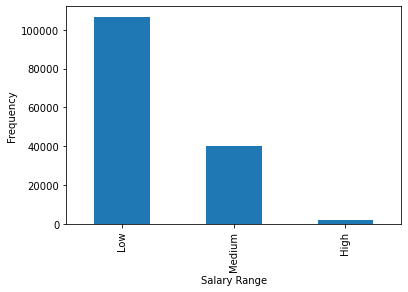

In [17]:
#Visualize a bar chart with the counts of observations across the three different ranges of the variable “TotalPay”: i.e., low, medium, and high salaries.

def salary_range(salary):
    if salary < 100000:
        return "Low"
    elif 100000 <= salary < 200000:
        return "Medium"
    elif salary >= 200000:
        return "High"

salaries_df["SalaryRange"] = salaries_df["TotalPay"].apply(lambda x: salary_range(x))
salaries_df["SalaryRange"].value_counts().plot(kind = "bar")
plt.xlabel("Salary Range")
plt.ylabel("Frequency")